In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs

# --- 1. MEMBUAT CORE DATA (POLA TERSEMBUNYI) ---
# Kita buat 3 kelompok perilaku pelanggan berdasarkan 3 fitur utama:
# (Tenure, MonthlyCharges, Avg_Download_GB)
X_core, y = make_blobs(n_samples=1000, centers=3, n_features=3, cluster_std=5.0, random_state=42)

# Konversi ke DataFrame awal
df = pd.DataFrame(X_core, columns=['Tenure', 'MonthlyCharges', 'Avg_Download_GB'])

# Memperbaiki range angka biar masuk akal
df['Tenure'] = df['Tenure'].abs() * 2 + 5         # Bulan (5 - 70 bulan)
df['MonthlyCharges'] = df['MonthlyCharges'].abs() * 10 + 200 # Ribu Rupiah (200rb - 1jt)
df['Avg_Download_GB'] = df['Avg_Download_GB'].abs() + 10     # GB (10 - 100 GB)

# --- 2. MENAMBAH KOLOM LAIN (CATEGORICAL & ID) ---
# Customer ID
df.insert(0, 'CustomerID', [f'CUST-{i+1000}' for i in range(len(df))])

# Kolom InternetService (Random)
services = ['DSL', 'Fiber Optic', 'No', 'Fiber', 'dsl'] # Perhatikan ketidakkonsistenan penulisan!
df['InternetService'] = np.random.choice(services, len(df))

# Kolom TotalCharges (Seharusnya Tenure * Monthly, tapi kita buat nanti jadi string)
df['TotalCharges'] = df['Tenure'] * df['MonthlyCharges']

# --- 3. MERUSAK DATA (DATA DIRTYING) ---

# A. Masalah Tipe Data (TotalCharges jadi String karena ada spasi kosong)
# Kita ganti beberapa angka jadi spasi " " (ini sering terjadi di file CSV)
df.loc[10:20, 'TotalCharges'] = " " 
df.loc[50:55, 'TotalCharges'] = "Error"

# B. Masalah Missing Values (NaN)
df.loc[100:120, 'MonthlyCharges'] = np.nan
df.loc[300:310, 'InternetService'] = np.nan

# C. Masalah Outlier Ekstrem (Data Sampah)
# Ada pelanggan tenure 5000 bulan (mustahil, perusahaan baru 10 tahun)
df.loc[999, 'Tenure'] = 5000 
# Ada tagihan minus
df.loc[998, 'MonthlyCharges'] = -50000 

# D. Masalah Duplikat
# Kita copy data baris pertama dan masukkan lagi
df = pd.concat([df, df.iloc[:5]], ignore_index=True)

# Acak urutan
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("=== DATA PELANGGAN INDOTELCO (MENTAH) ===")
print(df.head())
print("\n=== INFO DATASETS ===")
print(df.info())

=== DATA PELANGGAN INDOTELCO (MENTAH) ===
  CustomerID     Tenure  MonthlyCharges  Avg_Download_GB InternetService  \
0  CUST-1926   6.984034      283.527889        14.271823              No   
1  CUST-1630  17.259832      277.870188        13.020002             DSL   
2  CUST-1682  11.104682      287.368613        15.936825     Fiber Optic   
3  CUST-1514  14.872056      334.034120        12.471627              No   
4  CUST-1365  21.826164      289.936870        15.576795     Fiber Optic   

  TotalCharges  
0  1980.168499  
1   4795.99278  
2  3191.137036  
3  4967.774299  
4  6328.209704  

=== INFO DATASETS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1005 non-null   object 
 1   Tenure           1005 non-null   float64
 2   MonthlyCharges   984 non-null    float64
 3   Avg_Download_GB  1005 non-null   fl

/tmp/ipykernel_6300/1466643075.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value ' ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[10:20, 'TotalCharges'] = " "


In [3]:
df

,CustomerID,Tenure,MonthlyCharges,Avg_Download_GB,InternetService,TotalCharges
0,CUST-1926,6.984034,283.527889,14.271823,No,1980.168499
1,CUST-1630,17.259832,277.870188,13.020002,DSL,4795.99278
2,CUST-1682,11.104682,287.368613,15.936825,Fiber Optic,3191.137036
3,CUST-1514,14.872056,334.034120,12.471627,No,4967.774299
4,CUST-1365,21.826164,289.936870,15.576795,Fiber Optic,6328.209704
...,...,...,...,...,...,...
1000,CUST-1106,13.091890,NaN,16.213485,Fiber Optic,2859.466579
1001,CUST-1270,11.459396,268.873797,18.804319,DSL,3081.131256
1002,CUST-1860,8.760759,214.988956,18.875669,Fiber Optic,1883.4665
1003,CUST-1435,21.534000,323.755726,11.525606,DSL,6971.755838


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1005 non-null   object 
 1   Tenure           1005 non-null   float64
 2   MonthlyCharges   984 non-null    float64
 3   Avg_Download_GB  1005 non-null   float64
 4   InternetService  994 non-null    object 
 5   TotalCharges     1005 non-null   object 
dtypes: float64(3), object(3)
memory usage: 47.2+ KB


In [5]:
df.isnull().sum()

CustomerID          0
Tenure              0
MonthlyCharges     21
Avg_Download_GB     0
InternetService    11
TotalCharges        0
dtype: int64

In [6]:
null = df[df['MonthlyCharges'].isnull()]
null

,CustomerID,Tenure,MonthlyCharges,Avg_Download_GB,InternetService,TotalCharges
19,CUST-1101,7.932999,NaN,18.640175,Fiber Optic,1625.523365
70,CUST-1107,23.541275,NaN,15.308192,No,8311.525511
137,CUST-1120,30.166970,NaN,16.125077,Fiber,10078.902633
174,CUST-1110,13.821762,NaN,21.601508,Fiber Optic,4981.406219
247,CUST-1109,14.000335,NaN,13.087570,DSL,4108.262574
273,CUST-1118,18.009493,NaN,12.908394,Fiber,5376.798625
395,CUST-1108,17.342562,NaN,12.576830,dsl,3558.206485
463,CUST-1113,26.634943,NaN,11.693371,DSL,7038.391088
467,CUST-1104,18.418763,NaN,11.759720,dsl,4671.104894
468,CUST-1114,7.227710,NaN,17.906545,dsl,2343.255935


In [7]:
df["MonthlyCharges"] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].median())
df

,CustomerID,Tenure,MonthlyCharges,Avg_Download_GB,InternetService,TotalCharges
0,CUST-1926,6.984034,283.527889,14.271823,No,1980.168499
1,CUST-1630,17.259832,277.870188,13.020002,DSL,4795.99278
2,CUST-1682,11.104682,287.368613,15.936825,Fiber Optic,3191.137036
3,CUST-1514,14.872056,334.034120,12.471627,No,4967.774299
4,CUST-1365,21.826164,289.936870,15.576795,Fiber Optic,6328.209704
...,...,...,...,...,...,...
1000,CUST-1106,13.091890,276.853004,16.213485,Fiber Optic,2859.466579
1001,CUST-1270,11.459396,268.873797,18.804319,DSL,3081.131256
1002,CUST-1860,8.760759,214.988956,18.875669,Fiber Optic,1883.4665
1003,CUST-1435,21.534000,323.755726,11.525606,DSL,6971.755838


In [8]:
df.isnull().sum()

CustomerID          0
Tenure              0
MonthlyCharges      0
Avg_Download_GB     0
InternetService    11
TotalCharges        0
dtype: int64

In [9]:
df['InternetService'] = df['InternetService'].fillna(df['InternetService'].mode()[0])
df

,CustomerID,Tenure,MonthlyCharges,Avg_Download_GB,InternetService,TotalCharges
0,CUST-1926,6.984034,283.527889,14.271823,No,1980.168499
1,CUST-1630,17.259832,277.870188,13.020002,DSL,4795.99278
2,CUST-1682,11.104682,287.368613,15.936825,Fiber Optic,3191.137036
3,CUST-1514,14.872056,334.034120,12.471627,No,4967.774299
4,CUST-1365,21.826164,289.936870,15.576795,Fiber Optic,6328.209704
...,...,...,...,...,...,...
1000,CUST-1106,13.091890,276.853004,16.213485,Fiber Optic,2859.466579
1001,CUST-1270,11.459396,268.873797,18.804319,DSL,3081.131256
1002,CUST-1860,8.760759,214.988956,18.875669,Fiber Optic,1883.4665
1003,CUST-1435,21.534000,323.755726,11.525606,DSL,6971.755838


In [10]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [11]:
df

,CustomerID,Tenure,MonthlyCharges,Avg_Download_GB,InternetService,TotalCharges
0,CUST-1926,6.984034,283.527889,14.271823,No,1980.168499
1,CUST-1630,17.259832,277.870188,13.020002,DSL,4795.99278
2,CUST-1682,11.104682,287.368613,15.936825,Fiber Optic,3191.137036
3,CUST-1514,14.872056,334.034120,12.471627,No,4967.774299
4,CUST-1365,21.826164,289.936870,15.576795,Fiber Optic,6328.209704
...,...,...,...,...,...,...
1000,CUST-1106,13.091890,276.853004,16.213485,Fiber Optic,2859.466579
1001,CUST-1270,11.459396,268.873797,18.804319,DSL,3081.131256
1002,CUST-1860,8.760759,214.988956,18.875669,Fiber Optic,1883.4665
1003,CUST-1435,21.534000,323.755726,11.525606,DSL,6971.755838


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   object 
 1   Tenure           1000 non-null   float64
 2   MonthlyCharges   1000 non-null   float64
 3   Avg_Download_GB  1000 non-null   float64
 4   InternetService  1000 non-null   object 
 5   TotalCharges     1000 non-null   object 
dtypes: float64(3), object(3)
memory usage: 54.7+ KB


In [13]:
df

,CustomerID,Tenure,MonthlyCharges,Avg_Download_GB,InternetService,TotalCharges
0,CUST-1926,6.984034,283.527889,14.271823,No,1980.168499
1,CUST-1630,17.259832,277.870188,13.020002,DSL,4795.99278
2,CUST-1682,11.104682,287.368613,15.936825,Fiber Optic,3191.137036
3,CUST-1514,14.872056,334.034120,12.471627,No,4967.774299
4,CUST-1365,21.826164,289.936870,15.576795,Fiber Optic,6328.209704
...,...,...,...,...,...,...
1000,CUST-1106,13.091890,276.853004,16.213485,Fiber Optic,2859.466579
1001,CUST-1270,11.459396,268.873797,18.804319,DSL,3081.131256
1002,CUST-1860,8.760759,214.988956,18.875669,Fiber Optic,1883.4665
1003,CUST-1435,21.534000,323.755726,11.525606,DSL,6971.755838


In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

/tmp/ipykernel_6300/2744223278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   object 
 1   Tenure           1000 non-null   float64
 2   MonthlyCharges   1000 non-null   float64
 3   Avg_Download_GB  1000 non-null   float64
 4   InternetService  1000 non-null   object 
 5   TotalCharges     983 non-null    float64
dtypes: float64(4), object(2)
memory usage: 54.7+ KB


In [16]:
numeric = df.select_dtypes('number').columns
numeric

Index(['Tenure', 'MonthlyCharges', 'Avg_Download_GB', 'TotalCharges'], dtype='object')

/home/ahmad/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/tmp/ipykernel_6300/4232848235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[colum], palette='viridis')
/tmp/ipykernel_6300/4232848235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[colum], palette='viridis')
/tmp/ipykernel_6300/4232848235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is

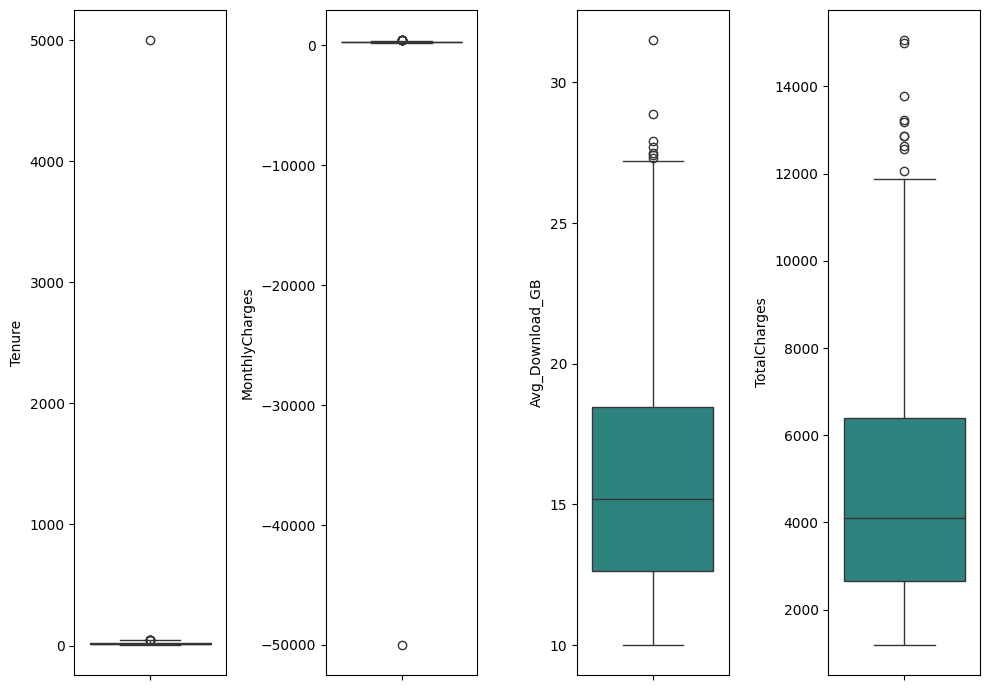

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
for i, colum in enumerate(numeric):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(df[colum], palette='viridis')
plt.tight_layout()
plt.show()

In [18]:

df = df[df['MonthlyCharges'] > 0]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       999 non-null    object 
 1   Tenure           999 non-null    float64
 2   MonthlyCharges   999 non-null    float64
 3   Avg_Download_GB  999 non-null    float64
 4   InternetService  999 non-null    object 
 5   TotalCharges     982 non-null    float64
dtypes: float64(4), object(2)
memory usage: 54.6+ KB


In [20]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       999 non-null    object 
 1   Tenure           999 non-null    float64
 2   MonthlyCharges   999 non-null    float64
 3   Avg_Download_GB  999 non-null    float64
 4   InternetService  999 non-null    object 
 5   TotalCharges     999 non-null    float64
dtypes: float64(4), object(2)
memory usage: 54.6+ KB


/tmp/ipykernel_6300/112318867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'].median())


In [21]:
df['InternetService'].value_counts()

InternetService
No             217
Fiber Optic    204
dsl            198
Fiber          195
DSL            185
Name: count, dtype: int64

In [22]:
df['InternetService'] = df['InternetService'].replace('Fiber Optic', 'Fiber')
df['InternetService'].value_counts()

/tmp/ipykernel_6300/1833933408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InternetService'] = df['InternetService'].replace('Fiber Optic', 'Fiber')


InternetService
Fiber    399
No       217
dsl      198
DSL      185
Name: count, dtype: int64

/tmp/ipykernel_6300/4232848235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[colum], palette='viridis')
/tmp/ipykernel_6300/4232848235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[colum], palette='viridis')
/tmp/ipykernel_6300/4232848235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[colum], palette='viridis')
/tmp/ipykernel_6300/4232848235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sa

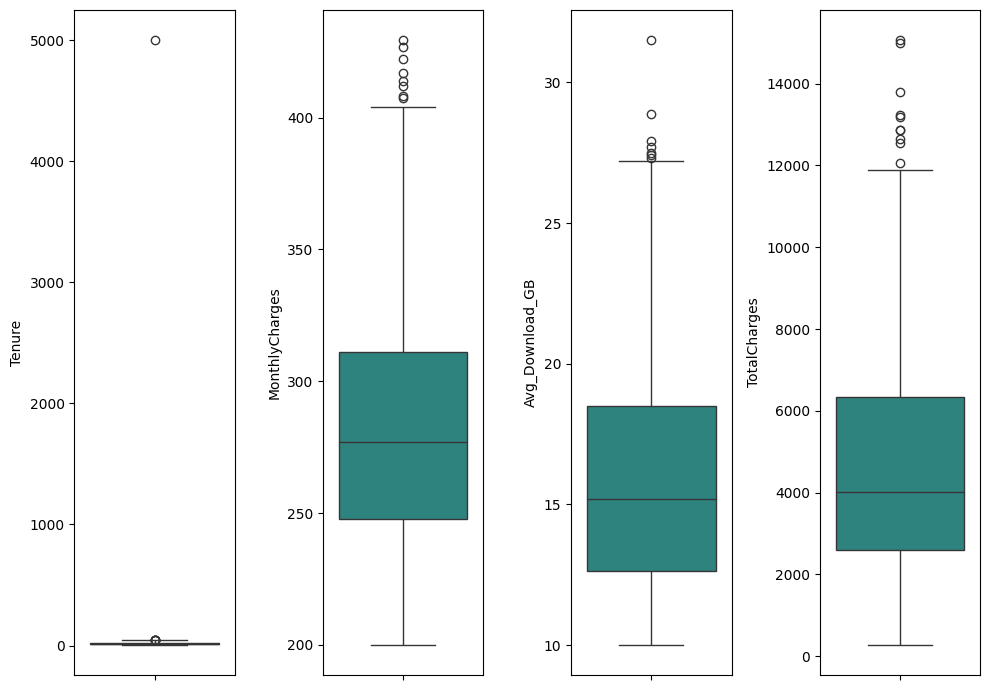

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
for i, colum in enumerate(numeric):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(df[colum], palette='viridis')
plt.tight_layout()
plt.show()

In [24]:
q1 = df[numeric].quantile(0.25)
q3 = df[numeric].quantile(0.75)

iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

condition = ~((df[numeric] < lower ) | (df[numeric] > upper)).any(axis=1)
numeric_features = df.loc[condition, numeric]
numeric_features

,Tenure,MonthlyCharges,Avg_Download_GB,TotalCharges
0,6.984034,283.527889,14.271823,1980.168499
1,17.259832,277.870188,13.020002,4795.992780
2,11.104682,287.368613,15.936825,3191.137036
3,14.872056,334.034120,12.471627,4967.774299
4,21.826164,289.936870,15.576795,6328.209704
...,...,...,...,...
1000,13.091890,276.853004,16.213485,2859.466579
1001,11.459396,268.873797,18.804319,3081.131256
1002,8.760759,214.988956,18.875669,1883.466500
1003,21.534000,323.755726,11.525606,6971.755838


/tmp/ipykernel_6300/2389038404.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(numeric_features[colum], palette='viridis')
/tmp/ipykernel_6300/2389038404.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(numeric_features[colum], palette='viridis')
/tmp/ipykernel_6300/2389038404.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(numeric_features[colum], palette='viridis')
/tmp/ipykernel_6300/2389038404.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable 

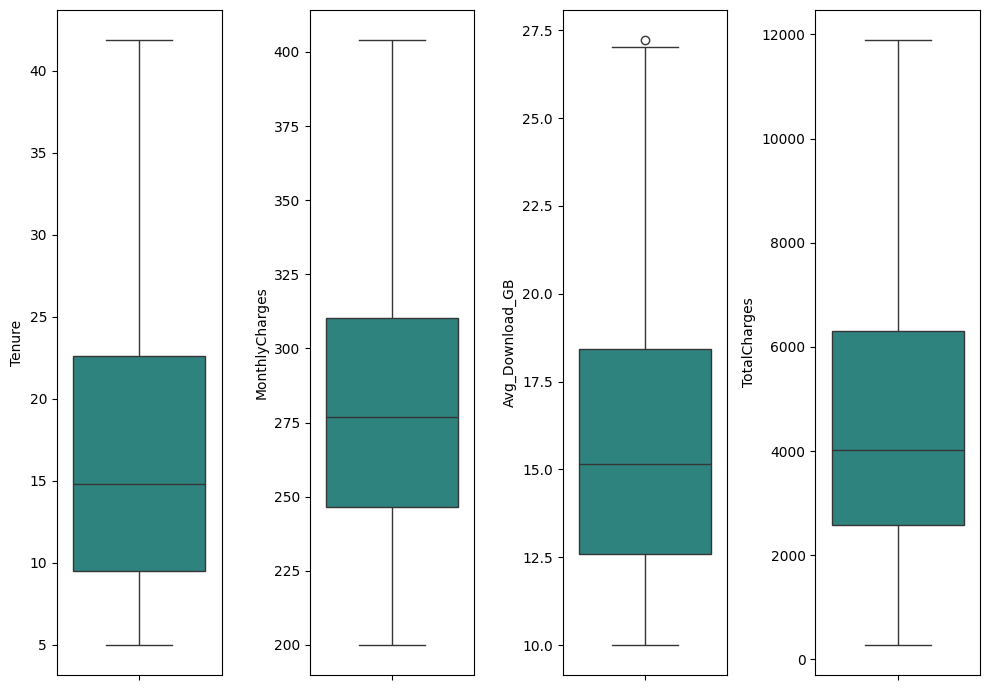

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
for i, colum in enumerate(numeric):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(numeric_features[colum], palette='viridis')
plt.tight_layout()
plt.show()

In [26]:
numeric_features

,Tenure,MonthlyCharges,Avg_Download_GB,TotalCharges
0,6.984034,283.527889,14.271823,1980.168499
1,17.259832,277.870188,13.020002,4795.992780
2,11.104682,287.368613,15.936825,3191.137036
3,14.872056,334.034120,12.471627,4967.774299
4,21.826164,289.936870,15.576795,6328.209704
...,...,...,...,...
1000,13.091890,276.853004,16.213485,2859.466579
1001,11.459396,268.873797,18.804319,3081.131256
1002,8.760759,214.988956,18.875669,1883.466500
1003,21.534000,323.755726,11.525606,6971.755838


In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

fitur = ['Tenure', 'MonthlyCharges', 'Avg_Download_GB']
x = numeric_features[fitur] 

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

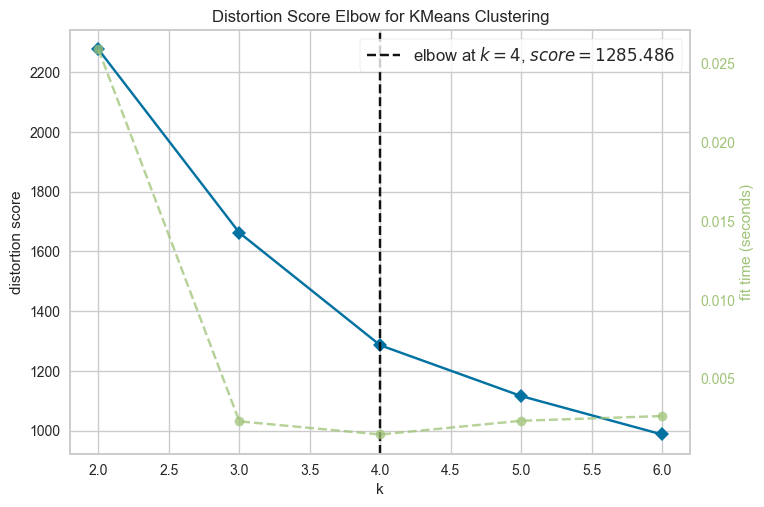

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 7))

visualizer.fit(x_scaled)
visualizer.show()

In [29]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(x_scaled)

numeric_features['Cluster Pelanggan'] = labels

profil = numeric_features.groupby('Cluster Pelanggan')[fitur].mean()
#menambahkan total orang dalam kelompok
profil['Jumlah Pelanggan'] = numeric_features['Cluster Pelanggan'].value_counts()
profil

,Tenure,MonthlyCharges,Avg_Download_GB,Jumlah Pelanggan
Cluster Pelanggan,,,,
0,12.434589,253.881337,13.175013,291
1,14.323221,331.380880,15.498287,252
2,13.060089,260.818496,20.855566,216
3,29.342126,268.764042,14.382762,214


In [30]:
import plotly.graph_objects as go

# Buat 3D scatter plot dengan Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=numeric_features['Tenure'],
    y=numeric_features['MonthlyCharges'],
    z=numeric_features['Avg_Download_GB'],
    mode='markers',
    marker=dict(
        size=5,
        color=numeric_features['Cluster Pelanggan'],
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title="Cluster"),
        line=dict(width=0.5, color='white')
    ),
    text=[f"Cluster: {c}" for c in numeric_features['Cluster Pelanggan']],
    hoverinfo='text'
)])

fig.update_layout(
    title='3D Clustering - Perilaku Pelanggan Telekomunikasi',
    scene=dict(
        xaxis_title='Tenure (bulan)',
        yaxis_title='Monthly Charges (ribu Rp)',
        zaxis_title='Avg Download GB'
    ),
    width=1000,
    height=800
)

fig.show()

In [31]:
# Quick cleaning pipeline
numeric = df.select_dtypes('number').columns

# Fill missing values
df["MonthlyCharges"] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].median())
df['InternetService'] = df['InternetService'].fillna(df['InternetService'].mode()[0])

# Drop duplicates
df = df.drop_duplicates()

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Remove negative charges
df = df[df['MonthlyCharges'] > 0]

# Fill TotalCharges NaN
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'].median())

# Standardize InternetService
df['InternetService'] = df['InternetService'].replace('Fiber Optic', 'Fiber')

# IQR Outlier removal
q1 = df[numeric].quantile(0.25)
q3 = df[numeric].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
condition = ~((df[numeric] < lower ) | (df[numeric] > upper)).any(axis=1)
numeric_features = df.loc[condition, numeric]

print(f"Data after cleaning: {len(numeric_features)} rows")

Data after cleaning: 973 rows


/tmp/ipykernel_6300/648645833.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_6300/648645833.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale features
fitur = ['Tenure', 'MonthlyCharges', 'Avg_Download_GB']
x = numeric_features[fitur] 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(x_scaled)

numeric_features['Cluster Pelanggan'] = labels



# Profiling
profil = numeric_features.groupby('Cluster Pelanggan')[fitur].mean()
profil['Jumlah Pelanggan'] = numeric_features['Cluster Pelanggan'].value_counts()
print(profil)

                      Tenure  MonthlyCharges  Avg_Download_GB  \
Cluster Pelanggan                                               
0                  12.434589      253.881337        13.175013   
1                  14.323221      331.380880        15.498287   
2                  13.060089      260.818496        20.855566   
3                  29.342126      268.764042        14.382762   

                   Jumlah Pelanggan  
Cluster Pelanggan                    
0                               291  
1                               252  
2                               216  
3                               214  


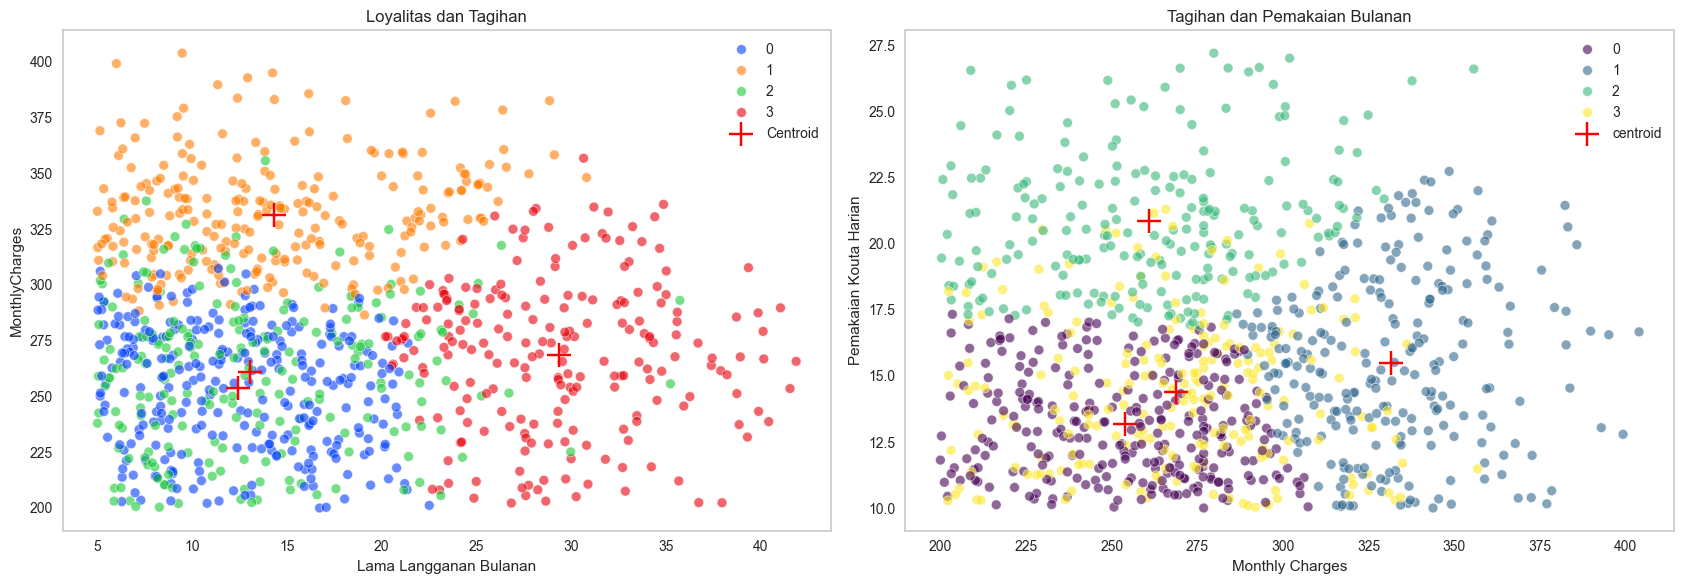

In [85]:
#TItik kordinat pusat
centroid_scaled = kmeans.cluster_centers_
centroid = scaler.inverse_transform(centroid_scaled)
df_centroid = pd.DataFrame(centroid, columns=['Tenure', 'MonthlyCharges', 'Avg Download GB'])

fig, axes = plt.subplots(1, 2, figsize=(17, 6))
sns.scatterplot(data=numeric_features, x='Tenure', y = 'MonthlyCharges', hue='Cluster Pelanggan', palette='bright', s=50, alpha=0.6, ax=axes[0])
axes[0].scatter(df_centroid['Tenure'], df_centroid['MonthlyCharges'], c='red', s=300, marker='+', label='Centroid')
axes[0].set_title('Loyalitas dan Tagihan')
axes[0].set_xlabel('Lama Langganan Bulanan')
axes[0].legend()
axes[0].grid(False)


sns.scatterplot(data=numeric_features, x='MonthlyCharges', y = 'Avg_Download_GB', hue='Cluster Pelanggan', palette='viridis', s=50, alpha=0.6, ax=axes[1])
axes[1].set_title('Tagihan dan Pemakaian Bulanan')
axes[1].scatter(df_centroid['MonthlyCharges'], df_centroid['Avg Download GB'], c = 'red', s=300, marker='+', label="centroid")
axes[1].set_xlabel('Monthly Charges')
axes[1].set_ylabel('Pemakaian Kouta Harian')
axes[1].legend()
axes[1].grid(False)

plt.tight_layout()
plt.show()

In [5]:
nama = 'ahfhas'
nama[0] = 'v'
print(nama)

TypeError: 'str' object does not support item assignment